In [1]:
import pandas as pd
import numpy as np

# aisle = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/aisles.csv')
# department = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/departments.csv')
# order_products_prior = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/order_products__prior.csv')
# order_products_train = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/order_products__train.csv')
# orders = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/orders.csv')
# products = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/products.csv')

# zyl --------- zyl
aisle = pd.read_csv('../DataSets/aisles.csv')
department = pd.read_csv('../DataSets/departments.csv')
order_products_prior = pd.read_csv('../DataSets/order_products__prior.csv')
order_products_train = pd.read_csv('../DataSets/order_products__train.csv')
orders = pd.read_csv('../DataSets/orders.csv')
products = pd.read_csv('../DataSets/products.csv')
# zyl --------- zyl


In [2]:
# Take out orderID and productID from both train and prior table and merge them into one order_products_id table
order_products_id1 = order_products_train[['order_id','product_id']]
order_products_id2 = order_products_prior[['order_id','product_id']]
order_products_id = order_products_id1.append(order_products_id2, ignore_index=True)
order_products_id

order_id  product_id
0                1       49302
1                1       11109
2                1       10246
3                1       49683
4                1       43633
...            ...         ...
33819101   3421083       39678
33819102   3421083       11352
33819103   3421083        4600
33819104   3421083       24852
33819105   3421083        5020

[33819106 rows x 2 columns]

In [3]:
# take out orderID and userID from orders table
order_user_id = orders[['order_id','user_id']]
order_user_id

order_id  user_id
0         2539329        1
1         2398795        1
2          473747        1
3         2254736        1
4          431534        1
...           ...      ...
3421078   2266710   206209
3421079   1854736   206209
3421080    626363   206209
3421081   2977660   206209
3421082    272231   206209

[3421083 rows x 2 columns]

In [4]:
# to see how many orders each user has altogether
user_order_count = order_user_id[['user_id','order_id']]
user_order_count['order_id'] = order_user_id['user_id']
user_order_count = user_order_count.groupby(user_order_count.columns.tolist()).size().reset_index().rename(columns={0:'count'})
user_order_count = user_order_count[['user_id','count']]
user_order_count

user_id  count
0             1     11
1             2     15
2             3     13
3             4      6
4             5      5
...         ...    ...
206204   206205      4
206205   206206     68
206206   206207     17
206207   206208     50
206208   206209     14

[206209 rows x 2 columns]

In [5]:
#combine order_products and products table to see what aisle each product belongs for each order
order_product_aisle = order_products_id.merge(products,on='product_id')
order_product_aisle

order_id  product_id                    product_name  aisle_id  \
0                1       49302                Bulgarian Yogurt       120   
1           816049       49302                Bulgarian Yogurt       120   
2          1242203       49302                Bulgarian Yogurt       120   
3          1383349       49302                Bulgarian Yogurt       120   
4          1787378       49302                Bulgarian Yogurt       120   
...            ...         ...                             ...       ...   
33819101   3265099       43492        Gourmet Burger Seasoning       104   
33819102   3361945       43492        Gourmet Burger Seasoning       104   
33819103   3267201       33097  Piquillo & Jalapeno Bruschetta        81   
33819104   3393151       38977                  Original Jerky       100   
33819105   3400803       23624     Flatbread Pizza All Natural        79   

          department_id  
0                    16  
1                    16  
2                    16  
3                    16  
4                    16  
...                 ...  
33819101             13  
33819102             13  
33819103             15  
33819104             21  
33819105              1  

[33819106 rows x 5 columns]

In [6]:
#from order_product_aisle table, only select orderID and aisleID to aggregate some data since we only deal with 
#aisle level granularity
#In addition, count of products from each aisle for each order is kept
order_aisle_id = order_product_aisle[['order_id','aisle_id']]
order_aisle_id
order_aisle_count = order_aisle_id.groupby(order_aisle_id.columns.tolist()).size().reset_index().rename(columns={0:'count'})
order_aisle_count

order_id  aisle_id  count
0                1        21      1
1                1        24      2
2                1        83      2
3                1        95      1
4                1       108      1
...            ...       ...    ...
24329217   3421083        52      1
24329218   3421083        74      1
24329219   3421083        78      1
24329220   3421083        92      4
24329221   3421083       117      1

[24329222 rows x 3 columns]

In [7]:
#join order_user_id table and order_aisle_count table to see which order belongs to which user
order_user_aisle = order_aisle_count.merge(order_user_id, on='order_id')
order_user_aisle

order_id  aisle_id  count  user_id
0                1        21      1   112108
1                1        24      2   112108
2                1        83      2   112108
3                1        95      1   112108
4                1       108      1   112108
...            ...       ...    ...      ...
24329217   3421083        52      1    25247
24329218   3421083        74      1    25247
24329219   3421083        78      1    25247
24329220   3421083        92      4    25247
24329221   3421083       117      1    25247

[24329222 rows x 4 columns]

In [8]:
#from order_user_aisle table, take out orderID
user_aisle_id = order_user_aisle[['user_id','aisle_id','count']]
user_aisle_id

user_id  aisle_id  count
0          112108        21      1
1          112108        24      2
2          112108        83      2
3          112108        95      1
4          112108       108      1
...           ...       ...    ...
24329217    25247        52      1
24329218    25247        74      1
24329219    25247        78      1
24329220    25247        92      4
24329221    25247       117      1

[24329222 rows x 3 columns]

In [9]:
# continue from previos step, we maintain count of orders for each aisle belonging to each user
user_aisle_count = user_aisle_id.groupby(user_aisle_id.columns.tolist()).size().reset_index().rename(columns={0:'rcount'})
user_aisle_count

user_id  aisle_id  count  rcount
0              1        21      1       9
1              1        23      1       9
2              1        23      2       2
3              1        24      1       1
4              1        24      4       1
...          ...       ...    ...     ...
8121982   206209       121      1       7
8121983   206209       123      1       2
8121984   206209       123      3       1
8121985   206209       130      1       3
8121986   206209       131      1       1

[8121987 rows x 4 columns]

In [10]:
#continue from previous step, we multiple two count column to get how many products each user bought from each aisle altogether
user_aisle_count['count'] = user_aisle_count['count']*user_aisle_count['rcount']

In [11]:
user_aisle_count = user_aisle_count[['user_id','aisle_id','count']]
user_aisle_count

user_id  aisle_id  count
0              1        21      9
1              1        23      9
2              1        23      4
3              1        24      1
4              1        24      4
...          ...       ...    ...
8121982   206209       121      7
8121983   206209       123      2
8121984   206209       123      3
8121985   206209       130      3
8121986   206209       131      1

[8121987 rows x 3 columns]

In [12]:
# user_order_count left join user_aisle_count
#count_x = product count
#count_y = order count
user_aisle_order_count = user_aisle_count.merge(user_order_count, how='left',on='user_id')
user_aisle_order_count


user_id  aisle_id  count_x  count_y
0              1        21        9       11
1              1        23        9       11
2              1        23        4       11
3              1        24        1       11
4              1        24        4       11
...          ...       ...      ...      ...
8121982   206209       121        7       14
8121983   206209       123        2       14
8121984   206209       123        3       14
8121985   206209       130        3       14
8121986   206209       131        1       14

[8121987 rows x 4 columns]

In [13]:
# divide product count by order count to get for aisle, how many products on average each customer would buy per order
user_aisle_order_count['avg'] = user_aisle_order_count['count_x']/user_aisle_order_count['count_y']
user_aisle_avgCount = user_aisle_order_count[['user_id','aisle_id','avg']]
user_aisle_avgCount

user_id  aisle_id       avg
0              1        21  0.818182
1              1        23  0.818182
2              1        23  0.363636
3              1        24  0.090909
4              1        24  0.363636
...          ...       ...       ...
8121982   206209       121  0.500000
8121983   206209       123  0.142857
8121984   206209       123  0.214286
8121985   206209       130  0.214286
8121986   206209       131  0.071429

[8121987 rows x 3 columns]

In [14]:
#pivot table
table = pd.pivot_table(user_aisle_avgCount, values='avg', index=['user_id'],columns=['aisle_id'], aggfunc=np.sum, fill_value=0)

In [15]:
table

aisle_id       1         2         3         4     5         6         7    \
user_id                                                                      
1         0.000000  0.000000  0.000000  0.000000  0.00  0.000000  0.000000   
2         0.133333  0.000000  0.466667  0.000000  0.00  0.000000  0.000000   
3         0.000000  0.000000  0.000000  0.307692  0.00  0.000000  0.000000   
4         0.000000  0.000000  0.000000  0.000000  0.00  0.000000  0.000000   
5         0.000000  0.000000  0.000000  0.000000  0.00  0.000000  0.000000   
...            ...       ...       ...       ...   ...       ...       ...   
206205    0.000000  0.000000  0.000000  0.000000  0.00  0.000000  0.000000   
206206    0.000000  0.044118  0.102941  0.014706  0.00  0.014706  0.000000   
206207    0.000000  0.000000  0.352941  0.000000  0.00  0.000000  0.117647   
206208    0.000000  0.000000  0.700000  0.220000  0.04  0.000000  0.020000   
206209    0.000000  0.000000  0.214286  0.000000  0.00  0.000000  0.000000   

aisle_id  8         9    10   ...       125  126  127       128       129  \
user_id                       ...                                           
1         0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.000000  0.000000   
2         0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.000000  0.000000   
3         0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.000000  0.000000   
4         0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.166667  0.000000   
5         0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.000000  0.000000   
...       ...       ...  ...  ...       ...  ...  ...       ...       ...   
206205    0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.000000  0.000000   
206206    0.0  0.000000  0.0  ...  0.000000  0.0  0.0  0.000000  0.044118   
206207    0.0  0.352941  0.0  ...  0.058824  0.0  0.0  0.117647  0.000000   
206208    0.0  0.040000  0.0  ...  0.000000  0.0  0.0  0.140000  0.000000   
206209    0.0  0.142857  0.0  ...  0.000000  0.0  0.0  0.000000  0.000000   

aisle_id       130       131  132  133       134  
user_id                                           
1         0.000000  0.000000  0.0  0.0  0.000000  
2         0.000000  0.000000  0.0  0.0  0.000000  
3         0.000000  0.000000  0.0  0.0  0.000000  
4         0.000000  0.000000  0.0  0.0  0.166667  
5         0.000000  0.000000  0.0  0.0  0.000000  
...            ...       ...  ...  ...       ...  
206205    0.000000  0.000000  0.0  0.0  0.000000  
206206    0.000000  0.000000  0.0  0.0  0.000000  
206207    0.176471  0.058824  0.0  0.0  0.000000  
206208    0.040000  0.040000  0.0  0.0  0.000000  
206209    0.214286  0.071429  0.0  0.0  0.000000  

[206209 rows x 134 columns]

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

table_arr = table.values
kmeans = KMeans(n_clusters=4, random_state=0).fit(table_arr)

start


In [48]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(table_arr)
MSE = []
MSE.append(kmeans.inertia_)
for i in range(1,12):
    print('start')
    KM_model = KMeans(n_clusters=i*3, random_state=0).fit(table_arr)
    print(KM_model.inertia_)
    MSE.append(KM_model.inertia_)


start
968951.8766834645
start
872509.5251716399
start
820224.4722039796
start
784671.2595469577
start
759355.1925682916
start
739998.0308377867
start
724705.5399973957
start
712231.5680286671
start
701871.1418298449
start
691928.549257858
start
683102.5748005619


Text(0.5, 1.0, ' Elbow curve ')

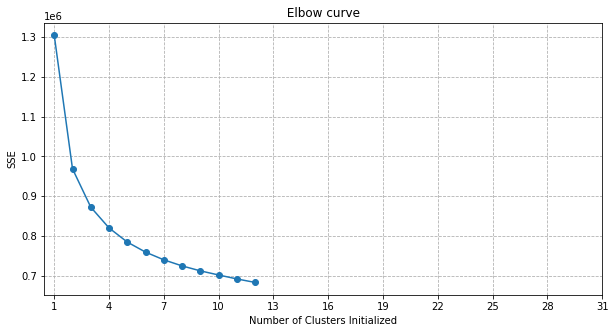

In [57]:
xticks = [1]
for i in range(1,12):
    xticks.append(i*3)
plt.figure(figsize=(10,5))   
plt.plot(range(1,13),MSE,'o-')
plt.xticks(range(1,33,3))
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel('SSE')
plt.title(" Elbow curve ")